# Salary Predictions based on Jobs

# Part 1 - DEFINE

### ---- 1 Define the problem ----

This project aims to predict salaries based on Jobs.

In [1]:
#import your libraries
import pandas as pd
import sklearn as sk
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

__author__ = "oyindamola oyetola"
__email__ = "oyindamola.oyetola@gmail.com"

In [2]:
import xgboost
from xgboost import XGBRegressor
print(xgboost.__version__)

1.4.2


## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [3]:
features_df = pd.read_csv('data/train_features.csv')
target_df = pd.read_csv('data/train_salaries.csv')
test_features_df = pd.read_csv('data/test_features.csv')

#### Examine the data

In [4]:
features_df.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16

In [5]:
target_df.head()

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [6]:
test_features_df.head()

jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44

#### check columns and data type

In [7]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [8]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [9]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


#### Merge features and target

In [10]:
job_salary_df = features_df.merge(target_df, how = "inner", on = "jobId")

In [11]:
job_salary_df.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  salary  
0   HEALTH               10                   83     130  
1      WEB                3                   73     101  
2   HEALTH               10                   38     137  
3     AUTO                8                   17     142  
4  FINANCE                8                   16     163

### ---- 3 Clean the data ----

#### Check for duplicates

In [12]:
job_salary_df.duplicated().sum()

0

In [13]:
test_features_df.duplicated().sum()

0

### Check for null values

In [14]:
job_salary_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [15]:
test_features_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

### check for outliers

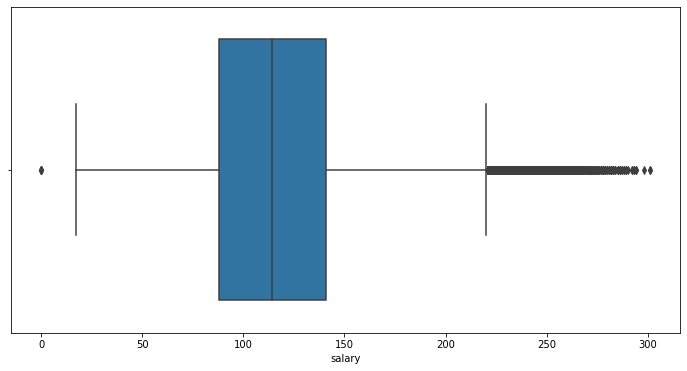

In [16]:
plt.figure(figsize = (12, 6))
sns.boxplot(x='salary',data=job_salary_df)
plt.show()

### Use IQR rule to identify potential Outliers

In [17]:
stat = job_salary_df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers is {} and {}.'.format(upper,lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers is 220.5 and 8.5.


In [18]:
#Examine data below the lower bound
job_salary_df[job_salary_df['salary'] < 8.5]

jobId companyId         jobType       degree        major  \
30559   JOB1362684438246    COMP44          JUNIOR     DOCTORAL         MATH   
495984  JOB1362684903671    COMP34          JUNIOR         NONE         NONE   
652076  JOB1362685059763    COMP25             CTO  HIGH_SCHOOL         NONE   
816129  JOB1362685223816    COMP42         MANAGER     DOCTORAL  ENGINEERING   
828156  JOB1362685235843    COMP40  VICE_PRESIDENT      MASTERS  ENGINEERING   

       industry  yearsExperience  milesFromMetropolis  salary  
30559      AUTO               11                    7       0  
495984      OIL                1                   25       0  
652076     AUTO                6                   60       0  
816129  FINANCE               18                    6       0  
828156      WEB                3                   29       0

It's not logical to have someone earn 0 salary except they are volunteers, hence records with 0 salary will be dropped.

In [19]:
#Examine data above the upper bound
job_salary_df.loc[job_salary_df['salary'] > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

It's is logical for the job types above to be paid high salaries but we will need to examine the 'Junior' job type

In [20]:
job_salary_df[(job_salary_df['salary'] > 220.5) & (job_salary_df['jobType'] == 'JUNIOR')]

jobId companyId jobType     degree        major industry  \
1222    JOB1362684408909    COMP40  JUNIOR    MASTERS      COMPSCI      OIL   
27710   JOB1362684435397    COMP21  JUNIOR   DOCTORAL  ENGINEERING      OIL   
31355   JOB1362684439042    COMP45  JUNIOR   DOCTORAL      COMPSCI  FINANCE   
100042  JOB1362684507729    COMP17  JUNIOR   DOCTORAL     BUSINESS  FINANCE   
160333  JOB1362684568020    COMP18  JUNIOR   DOCTORAL     BUSINESS  FINANCE   
189582  JOB1362684597269    COMP32  JUNIOR   DOCTORAL     BUSINESS      OIL   
214606  JOB1362684622293    COMP47  JUNIOR    MASTERS     BUSINESS  FINANCE   
303778  JOB1362684711465    COMP51  JUNIOR    MASTERS  ENGINEERING      WEB   
348354  JOB1362684756041    COMP56  JUNIOR   DOCTORAL  ENGINEERING      OIL   
427593  JOB1362684835280    COMP54  JUNIOR   DOCTORAL  ENGINEERING  FINANCE   
500739  JOB1362684908426    COMP40  JUNIOR   DOCTORAL  ENGINEERING      OIL   
627534  JOB1362685035221     COMP5  JUNIOR   DOCTORAL  ENGINEERING      OIL   
645555  JOB1362685053242    COMP36  JUNIOR   DOCTORAL     BUSINESS  FINANCE   
656572  JOB1362685064259    COMP28  JUNIOR   DOCTORAL     BUSINESS      OIL   
685775  JOB1362685093462    COMP38  JUNIOR  BACHELORS  ENGINEERING      OIL   
743326  JOB1362685151013    COMP14  JUNIOR   DOCTORAL     BUSINESS  FINANCE   
787674  JOB1362685195361    COMP43  JUNIOR   DOCTORAL     BUSINESS  FINANCE   
796956  JOB1362685204643    COMP30  JUNIOR    MASTERS     BUSINESS      OIL   
855219  JOB1362685262906    COMP13  JUNIOR    MASTERS  ENGINEERING      OIL   
954368  JOB1362685362055    COMP11  JUNIOR   DOCTORAL     BUSINESS      OIL   

        yearsExperience  milesFromMetropolis  salary  
1222                 24                    5     225  
27710                24                    3     246  
31355                24                    0     225  
100042               23                    8     248  
160333               22                    3     223  
189582               24                   11     221  
214606               22                    4     222  
303778               24                    2     226  
348354               23                   25     226  
427593               23                    3     221  
500739               21                    0     227  
627534               24                   29     230  
645555               24                    1     225  
656572               22                    3     222  
685775               24                   13     225  
743326               19                    0     236  
787674               18                   15     232  
796956               24                    2     228  
855219               22                   26     225  
954368               24                   26     223

It's logical for a junior in the Finance and oil industry with the listed years of experience to earn a high salary, hence the data will not be deleted

In [21]:
# drop records below the lower bound
job_salary_df.drop(job_salary_df[job_salary_df['salary'] < 8.5].index, inplace=True)

In [22]:
#The jobId will be dropped as the values are unique and won't be beneficial to the salary prediction
print("There are {} unique Job IDs". format(len(np.unique(job_salary_df['jobId']))))

There are 999995 unique Job IDs


In [23]:
#drop job ID
job_salary_df.drop(job_salary_df[job_salary_df['salary'] < 8.5].index, inplace=True)

### ---- 4 Explore the data (EDA) ----

#### Summarize numeric features

In [24]:
job_salary_df.describe(include=[np.number])

yearsExperience  milesFromMetropolis         salary
count    999995.000000        999995.000000  999995.000000
mean         11.992407            49.529381     116.062398
std           7.212390            28.877721      38.717163
min           0.000000             0.000000      17.000000
25%           6.000000            25.000000      88.000000
50%          12.000000            50.000000     114.000000
75%          18.000000            75.000000     141.000000
max          24.000000            99.000000     301.000000

#### Summarize categorical features

In [25]:
job_salary_df.describe(include=['O'])

jobId companyId jobType       degree   major industry
count             999995    999995  999995       999995  999995   999995
unique            999995        63       8            5       9        7
top     JOB1362685295783    COMP39  SENIOR  HIGH_SCHOOL    NONE      WEB
freq                   1     16193  125886       236975  532353   143205

In [26]:
def plot_features(df,col):
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        avg = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = avg.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    
    plt.subplot(1, 2, 2)
    
    if df[col].dtype == 'int64' or col == 'companyId':
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values - std.values, mean.values + std.values, alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data = df)
        
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

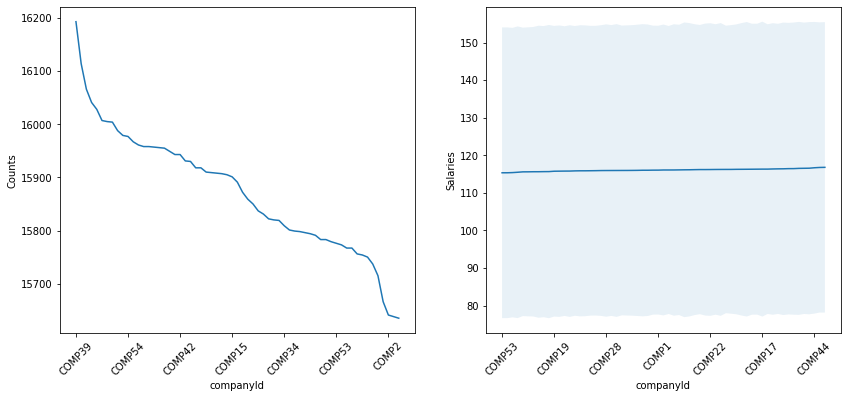

In [27]:
plot_features(job_salary_df,'companyId')

There is really no correlation between average salaries and companies

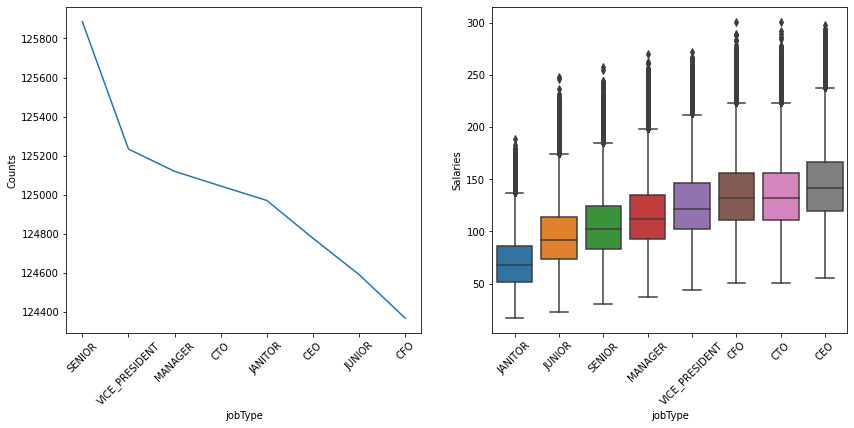

In [28]:
plot_features(job_salary_df,'jobType')

There is some positive correlation between average salaries and job type. It is logical to have janitors and juniors earn the lowest salaries while CEOs earn more than others

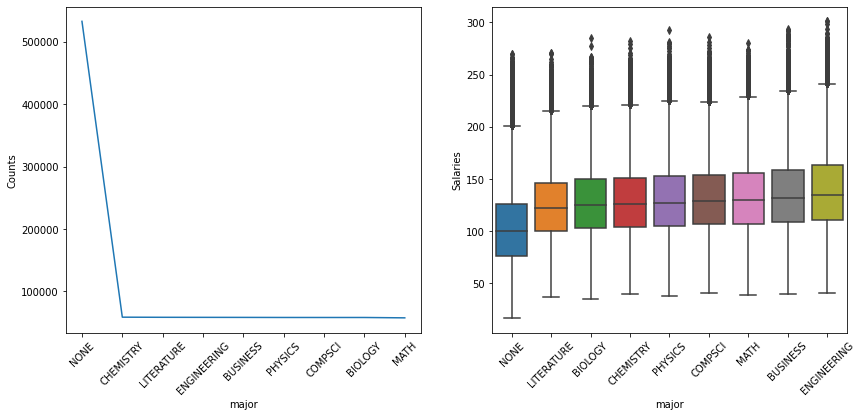

In [29]:
plot_features(job_salary_df,'major')

There is some positive correlation between average salaries and majors. It is logical for Engineering and business majors to earn more

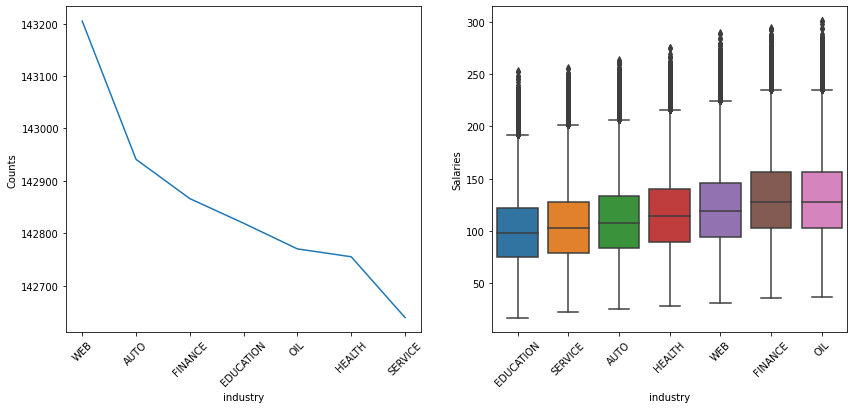

In [30]:
plot_features(job_salary_df,'industry')

There is some positive correlation between average salaries and industries. The oil and finance industries tend to earn higher salaries while the education industry earns the least.

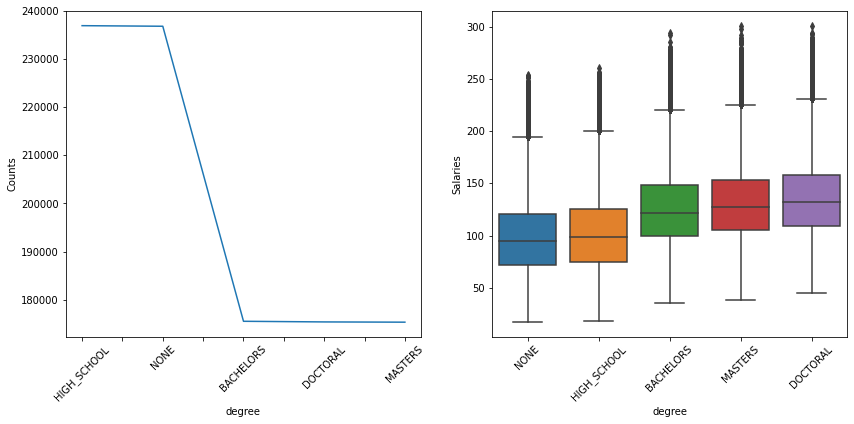

In [31]:
plot_features(job_salary_df,'degree')

There is some positive correlation between average salaries and degree. The doctoral degree tends to earn higher and jobs with no degree earn the lowest salaries.

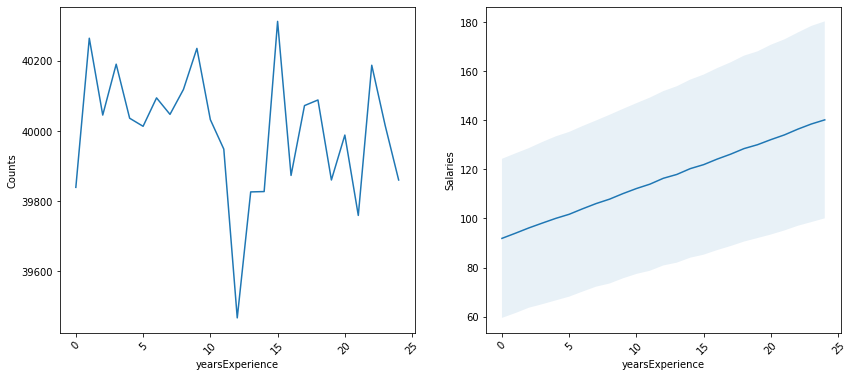

In [32]:
plot_features(job_salary_df,'yearsExperience')

There is some strong positive correlation between the years of experience and average salaries. The more the years of experience the more the salary.

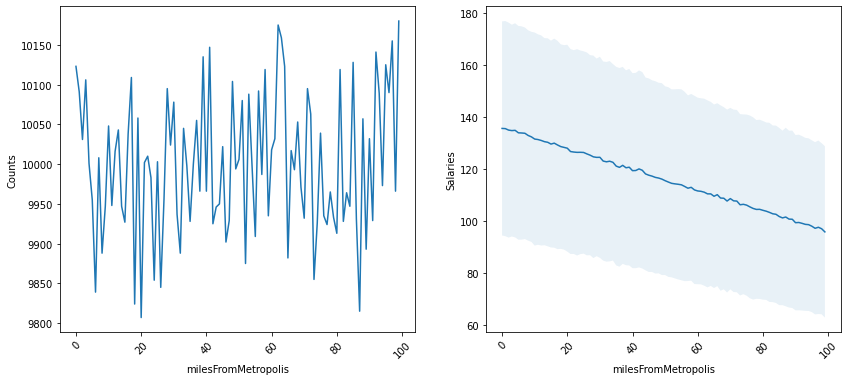

In [33]:
plot_features(job_salary_df,'milesFromMetropolis')

There is some strong negative correlation between the miles from the metropolis and the average salaries. Jobs closer to the metropolis earn higher salaries while jobs farther from the metropolis earn less.

In [34]:
#Make a copy of the data frame
job_salary_analyze_df = job_salary_df.copy()

In [35]:
def encode_label(df,col):
    #encode the categories using average salary for each category to replace label
    cat_dict = {}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = job_salary_analyze_df[job_salary_analyze_df[col] == cat]['salary'].mean()
    df[col] = df[col].map(cat_dict)

In [36]:
for col in job_salary_analyze_df.columns:
    if job_salary_analyze_df[col].dtype.name == "category":
        encode_label(job_salary_analyze_df,col)
        job_salary_analyze_df[col] = pd.to_numeric(job_salary_analyze_df[col])

In [37]:
job_salary_analyze_df.head(10)

jobId   companyId     jobType      degree       major  \
0  JOB1362684407687  115.345049  135.458547  130.505647  133.322042   
1  JOB1362684407688  115.756548  145.311425  101.921085  102.583864   
2  JOB1362684407689  116.224249  125.368630  135.490979  130.372436   
3  JOB1362684407690  116.199380  115.368518  135.490979  129.072085   
4  JOB1362684407691  115.888501  125.368630  125.454663  130.372436   
5  JOB1362684407692  115.847117  115.368518  135.490979  132.075605   
6  JOB1362684407693  115.847117  135.458547   98.176882  102.583864   
7  JOB1362684407694  116.176489   95.333087  125.454663  129.072085   
8  JOB1362684407695  115.934192   70.813045  101.921085  102.583864   
9  JOB1362684407696  116.515543  125.368630  125.454663  129.072085   

     industry  yearsExperience  milesFromMetropolis  salary  
0  115.735540               10                   83     130  
1  121.645362                3                   73     101  
2  115.735540               10                   38     137  
3  109.435222                8                   17     142  
4  130.747659                8                   16     163  
5  130.747659                2                   31     113  
6  115.735540               23                   24     178  
7   99.448386                9                   70      73  
8   99.448386                1                   54      31  
9  109.435222               17                   68     104

In [38]:
job_salary_analyze_df.dtypes

jobId                   object
companyId              float64
jobType                float64
degree                 float64
major                  float64
industry               float64
yearsExperience          int64
milesFromMetropolis      int64
salary                   int64
dtype: object

Heat map showing correlation between average salaries by job features and salaries

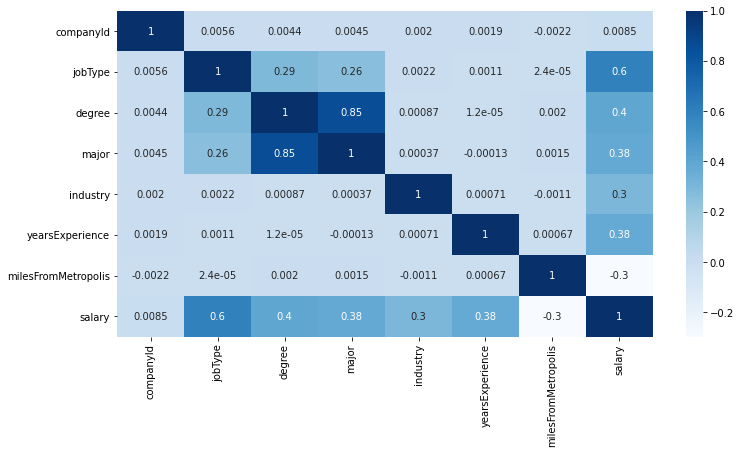

In [39]:
plt.figure(figsize = (12,6))
features = ['companyId','jobType', 'degree', 'major','industry','yearsExperience','milesFromMetropolis','salary']
sns.heatmap(job_salary_analyze_df[features].corr(), cmap='Blues', annot = True)
plt.show()

There is a correlation between the jobType and salary. There is also a correlation between the major and degree

### ---- 5 Establish a baseline ----

In [40]:
#Average salary by degree
salary_pred1 = job_salary_analyze_df['degree']
mean_squared_e1 = mean_squared_error(job_salary_analyze_df['salary'], salary_pred1)
print("Mean Square Error for average salary by degree:", mean_squared_e1)
print("")

Mean Square Error for average salary by degree: 1257.6131909615312



### ---- 6 Hypothesize solution ----

I will be trying out the following models: Linear regression, random forest and xgboost regressor to improve results over the baseline model.

## Part 3 - DEVELOP

### ---- 7 Engineer features  ----

In [41]:
#jobId and CompanyId will also be dropped because jobid has unique values and there was really no relationship observed while 
#ploting the company against average salary per company
job_salary_df.drop(['jobId','companyId'], axis=1,inplace = True)

In [42]:
cat_variables = ['jobType','degree','industry','major']

In [43]:
dummy_cat_variables = pd.get_dummies(job_salary_df[cat_variables])
job_salary_df = pd.concat([job_salary_df, dummy_cat_variables], axis = 1)
job_salary_df.drop(cat_variables, axis=1, inplace= True)

In [44]:
job_salary_df.head()

yearsExperience  milesFromMetropolis  salary  jobType_JANITOR  \
0               10                   83     130                0   
1                3                   73     101                0   
2               10                   38     137                0   
3                8                   17     142                0   
4                8                   16     163                0   

   jobType_JUNIOR  jobType_SENIOR  jobType_MANAGER  jobType_VICE_PRESIDENT  \
0               0               0                0                       0   
1               0               0                0                       0   
2               0               0                0                       1   
3               0               0                1                       0   
4               0               0                0                       1   

   jobType_CFO  jobType_CTO  ...  industry_OIL  major_NONE  major_LITERATURE  \
0            1            0  ...             0           0                 0   
1            0            0  ...             0           1                 0   
2            0            0  ...             0           0                 0   
3            0            0  ...             0           0                 0   
4            0            0  ...             0           0                 0   

   major_BIOLOGY  major_CHEMISTRY  major_PHYSICS  major_COMPSCI  major_MATH  \
0              0                0              0              0           1   
1              0                0              0              0           0   
2              0                0              1              0           0   
3              0                1              0              0           0   
4              0                0              1              0           0   

   major_BUSINESS  major_ENGINEERING  
0               0                  0  
1               0                  0  
2               0                  0  
3               0                  0  
4               0                  0  

[5 rows x 32 columns]

In [45]:
target = job_salary_df['salary']
job_salary_df.drop(['salary'], axis=1, inplace = True)

### ---- 8 Create models ----

In [46]:
#Linear Regression
lreg = LinearRegression()

In [47]:
#Random forest Regression
RF = RandomForestRegressor(n_estimators=150, n_jobs=2, max_depth=30, min_samples_split=60, max_features='auto', verbose=0)

In [48]:
#XGBoost Regression
XGB = XGBRegressor(nthread=2)

In [49]:
#Cross validation function
def cross_val(model,X,y):
    kf = KFold(n_splits = 5, random_state=None)
    result = cross_val_score(model , X, y, scoring="neg_mean_squared_error", cv = kf)
    return abs(result.mean())

### ---- 9 Test models ----

Test Linear Regression model

In [50]:
cross_val(lreg,job_salary_df,target)

384.4147392227127

Test Random Forest model

In [51]:
cross_val(RF,job_salary_df,target)

365.7449338712391

Test XGBoost model

In [52]:
cross_val(XGB,job_salary_df,target) #381.48

358.3835627902621

### ---- 10 Select best model  ----

In [53]:
#select the model with the lowest error as your "prodcuction" model
XGB.fit(job_salary_df,target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, nthread=2, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

## Part 4 - DEPLOY

In [54]:
test_features_df_copy = test_features_df.copy()

In [55]:
test_features_df.drop(['jobId','companyId'], axis=1,inplace = True)

In [56]:
dummy_cat_variables = pd.get_dummies(test_features_df[cat_variables])
test_features_df = pd.concat([test_features_df, dummy_cat_variables], axis = 1)
test_features_df.drop(cat_variables, axis=1, inplace= True)

In [57]:
predicted_sal = XGB.predict(test_features_df)

In [58]:
#pd.concat(test_features_df_copy,predicted_sal] , axis=1)
test_features_df_copy['Predicted_Salary'] = predicted_sal
test_features_df_copy.head(20) JOB1362684407687

jobId companyId         jobType       degree       major  \
0   JOB1362685407687    COMP33         MANAGER  HIGH_SCHOOL        NONE   
1   JOB1362685407688    COMP13          JUNIOR         NONE        NONE   
2   JOB1362685407689    COMP10             CTO      MASTERS     BIOLOGY   
3   JOB1362685407690    COMP21         MANAGER  HIGH_SCHOOL        NONE   
4   JOB1362685407691    COMP36          JUNIOR     DOCTORAL     BIOLOGY   
5   JOB1362685407692    COMP40             CTO      MASTERS     COMPSCI   
6   JOB1362685407693    COMP32          SENIOR      MASTERS     COMPSCI   
7   JOB1362685407694    COMP11             CEO    BACHELORS     BIOLOGY   
8   JOB1362685407695    COMP39         MANAGER     DOCTORAL     PHYSICS   
9   JOB1362685407696    COMP22  VICE_PRESIDENT         NONE        NONE   
10  JOB1362685407697    COMP27         JANITOR  HIGH_SCHOOL        NONE   
11  JOB1362685407698    COMP13          JUNIOR     DOCTORAL  LITERATURE   
12  JOB1362685407699    COMP48          JUNIOR    BACHELORS        MATH   
13  JOB1362685407700    COMP54          JUNIOR  HIGH_SCHOOL        NONE   
14  JOB1362685407701    COMP23         MANAGER      MASTERS  LITERATURE   
15  JOB1362685407702    COMP28  VICE_PRESIDENT  HIGH_SCHOOL        NONE   
16  JOB1362685407703    COMP26          JUNIOR      MASTERS     PHYSICS   
17  JOB1362685407704    COMP20         JANITOR         NONE        NONE   
18  JOB1362685407705    COMP60             CEO  HIGH_SCHOOL        NONE   
19  JOB1362685407706     COMP6          JUNIOR         NONE        NONE   

     industry  yearsExperience  milesFromMetropolis  Predicted_Salary  
0      HEALTH               22                   73        146.937744  
1        AUTO               20                   47        137.201355  
2      HEALTH               17                    9        134.630264  
3         OIL               14                   96        125.219093  
4         OIL               10                   44        115.555717  
5     FINANCE                6                   23        101.058426  
6     SERVICE                6                   32        146.965332  
7     SERVICE                9                   73         66.410492  
8      HEALTH                6                   78        116.364967  
9        AUTO               23                   97        132.367157  
10       AUTO               23                   60        117.821426  
11  EDUCATION               14                   48        120.945229  
12       AUTO                5                    1        110.289879  
13    SERVICE                0                   48        134.453049  
14    SERVICE               17                   64        161.307739  
15    SERVICE               13                   75        171.269577  
16     HEALTH               19                   76        133.784210  
17        WEB               23                   87        153.192184  
18  EDUCATION               17                   31         98.254372  
19    FINANCE                7                   52        121.025818

Feature Importance

In [59]:
feature_importances = pd.DataFrame(XGB.feature_importances_,
                                  index = job_salary_df.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()

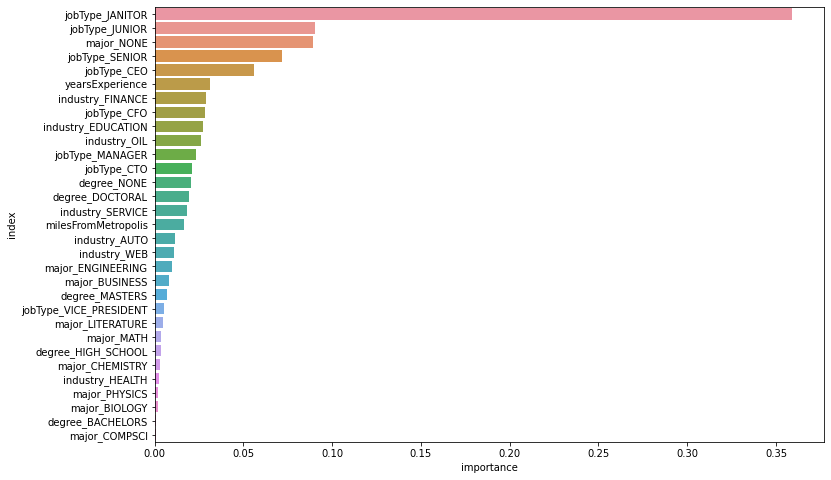

In [60]:
plt.figure(figsize = (12,8))
sns.barplot(x='importance', y='index', data=feature_importances)
plt.show()